In [7]:
import os
print(os.getcwd())  # This prints the current working directory
os.chdir(r'c:\users\ermias.tadesse\10x\Telecom-Analysis')  # Set the working directory to the project root
import pandas as pd

# Import the DBConnection and DataAnalysis classes
from scripts.db_connection import DBConnection
from scripts.user_endagement_analysis import UserEngagementAnalysis

c:\users\ermias.tadesse\10x\Telecom-Analysis


In [8]:
# Create a connection instance
db = DBConnection(dbname='tele_co', user='postgres', password='Ermi@123')

# Connect to the database
db.connect()

# Define a query to fetch data from the xdr_data table
query = "SELECT * FROM xdr_data;"

# Fetch data
data = db.fetch_data(query)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Applications
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
    
# Create a DataAnalysis instance
analysis = UserEngagementAnalysis(data, applications)

# Check if data is returned
if data is not None and not data.empty:
    # Display the DataFrame
    print(data.head())
else:
    print("No data available or data is empty.")

Successfully connected to the database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0  9.16456699548519E+015             42.0              5.0   
1                L77566A             65.0             

# Replace common null values and check for missing values

In [9]:
# Replace common null values and check for missing values
missing_vals = analysis.check_missing_values()
analysis.fill_missing_with_mean()

Total Data (DL+UL in Gigabytes) per Decile Class:
Decile Class
0     5065.721127
1     5689.831830
2     6087.498457
3     5619.824693
4     4790.473507
5     5984.912810
6     5729.941504
7     7285.023306
8     8666.417429
9    13843.110832
Name: Total Data (DL+UL), dtype: float64

Top 5 Deciles based on Total Data (DL+UL):
Decile Class
9    13843.110832
8     8666.417429
7     7285.023306
2     6087.498457
5     5984.912810
Name: Total Data (DL+UL), dtype: float64
Top 5 Highest Duration Decile Classes and Their Total Duration:
Decile Class: 9, Total Duration: 5106533.529 seconds
Decile Class: 8, Total Duration: 2486470.418 seconds
Decile Class: 7, Total Duration: 1869399.264 seconds
Decile Class: 6, Total Duration: 1579210.392 seconds
Decile Class: 5, Total Duration: 1254869.255 seconds


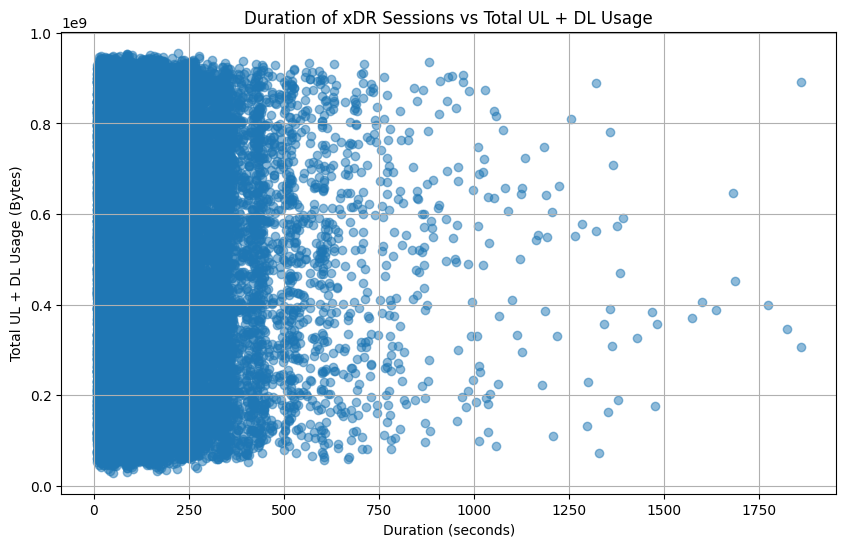

In [10]:
analysis.aggregate_data()
analysis.segment_deciles()
top_deciles = analysis.analyze_deciles()
analysis.average_session_duration()
analysis.plot_data_usage()

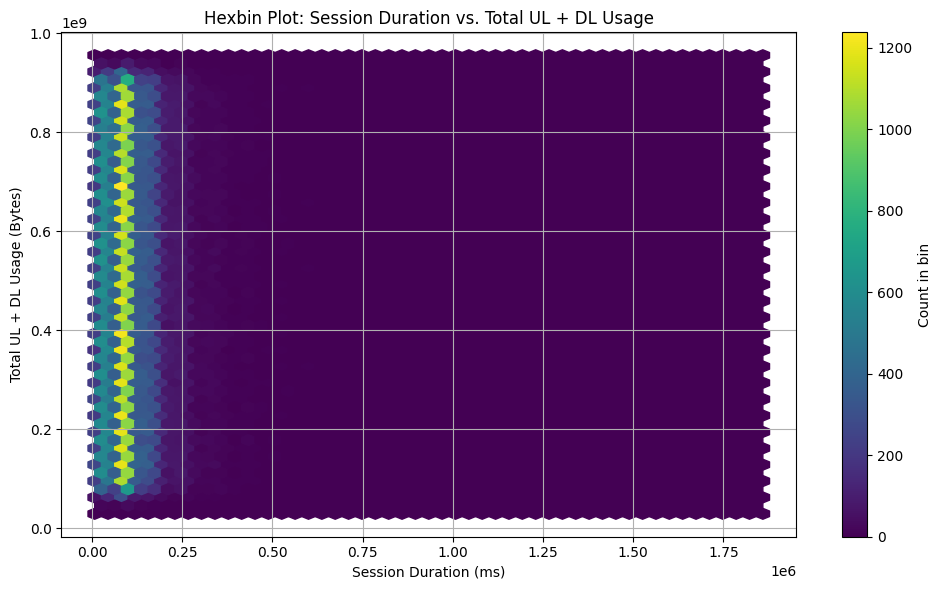

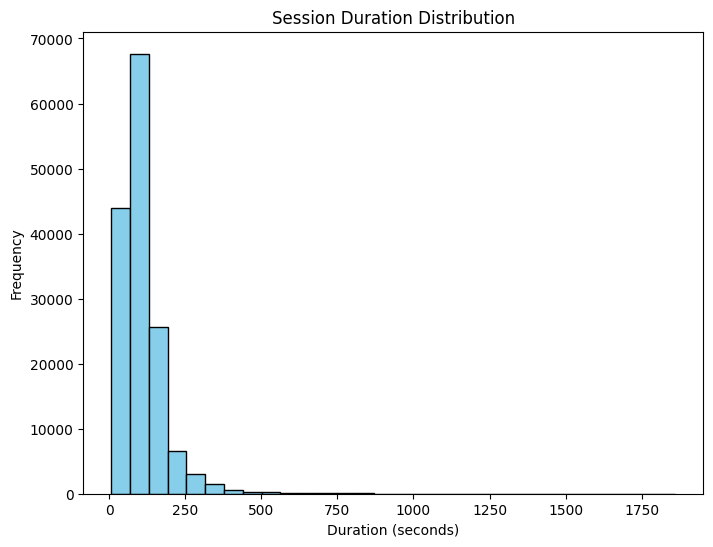

Network Performance Metrics:
       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
count    122172.000000    122189.000000            150000.000000   
mean        109.795706        17.662883             13300.045927   
std         619.782739        84.793524             23971.878541   
min           0.000000         0.000000                 0.000000   
25%          32.000000         2.000000                43.000000   
50%          45.000000         5.000000                63.000000   
75%          70.000000        15.000000             19710.750000   
max       96923.000000      7120.000000            378160.000000   

       Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
count            150000.000000                 6.185500e+04   
mean               1770.428647                 2.080991e+07   
std                4625.355500                 1.825665e+08   
min                   0.000000                 2.000000e+00   
25%                  47.000000             

In [11]:
analysis.plot_hexbin()
analysis.plot_session_duration_distribution()
analysis.analyze_network_performance()
analysis.calculate_session_duration_statistics()

Datetime columns identified: Index([], dtype='object')
Numeric DataFrame:
       Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0  1.311448e+19     770.0   662.0  1823652.0  2.082014e+14   3.366496e+10   
1  1.311448e+19     235.0   606.0  1365104.0  2.082019e+14   3.368185e+10   
2  1.311448e+19       1.0   652.0  1361762.0  2.082003e+14   3.376063e+10   
3  1.311448e+19     486.0   171.0  1321509.0  2.082014e+14   3.375034e+10   
4  1.311448e+19     565.0   954.0  1089009.0  2.082014e+14   3.369980e+10   

           IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0  3.552121e+13             42.0              5.0                     23.0   
1  3.579401e+13             65.0              5.0                     16.0   
2  3.528151e+13              NaN              NaN                      6.0   
3  3.535661e+13              NaN              NaN                     44.0   
4  3.540701e+13              NaN              NaN                      6

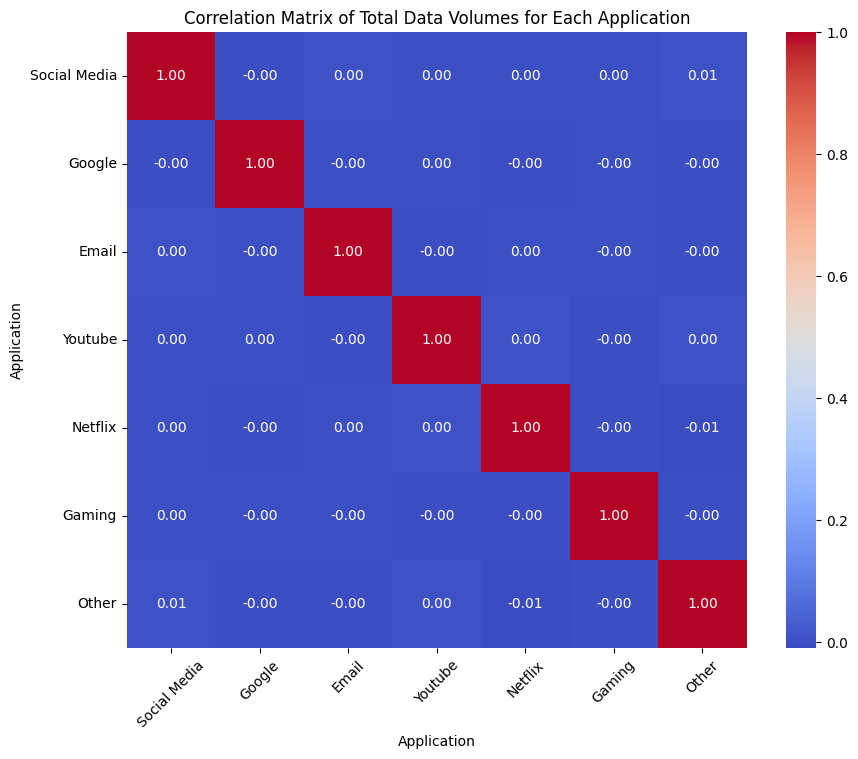

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [12]:
analysis.preprocess_data()
analysis.calculate_application_volumes()
analysis.perform_pca()
analysis.plot_explained_variance()
analysis.plot_cumulative_variance()